# Stockdata API

In [ ]:
import requests 
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
'7GR4LC4TFH6ULXOH'

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey={api_key}"
data = requests.get(url).json()
data['Time Series (Daily)']
# ALPHA_API_KEY

In [25]:
df = pd.DataFrame(data["Time Series (Daily)"]).transpose().astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 2021-11-05 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5541 non-null   float64
 1   2. high    5541 non-null   float64
 2   3. low     5541 non-null   float64
 3   4. close   5541 non-null   float64
 4   5. volume  5541 non-null   float64
dtypes: float64(5)
memory usage: 259.7+ KB


In [26]:
df.index

Index(['2021-11-05', '2021-11-04', '2021-11-03', '2021-11-02', '2021-11-01',
       '2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5541)

In [30]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-11-05,121.43,123.77,121.4300,123.61,6790478.0
2021-11-04,123.05,123.34,119.9000,120.85,7208736.0
2021-11-03,126.23,127.29,125.6800,127.13,5421406.0
2021-11-02,126.30,127.17,124.9100,126.18,4496393.0
2021-11-01,125.05,126.31,123.8375,126.28,5874767.0


In [31]:
df.loc["2021"]

,1. open,2. high,3. low,4. close,5. volume
2021-11-05,121.43,123.7700,121.4300,123.61,6790478.0
2021-11-04,123.05,123.3400,119.9000,120.85,7208736.0
2021-11-03,126.23,127.2900,125.6800,127.13,5421406.0
2021-11-02,126.30,127.1700,124.9100,126.18,4496393.0
2021-11-01,125.05,126.3100,123.8375,126.28,5874767.0
...,...,...,...,...,...
2021-01-08,128.57,129.3200,126.9800,128.53,4676487.0
2021-01-07,130.04,130.4600,128.2600,128.99,4507382.0
2021-01-06,126.90,131.8800,126.7200,129.29,7956740.0
2021-01-05,125.01,126.6800,124.6100,126.14,6114619.0


In [35]:
df.loc["2021-10-20":"2021-10-29"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,125.43,126.32,124.910,125.10,5916789.0
2021-10-28,125.17,126.31,124.620,125.84,6503003.0
2021-10-27,127.44,127.88,125.010,125.17,6973432.0
2021-10-26,127.52,128.30,126.755,127.13,8520872.0
2021-10-25,127.53,128.65,126.940,127.64,6374038.0
2021-10-22,128.05,130.25,126.611,127.88,11582195.0
2021-10-21,133.51,133.72,128.100,128.33,31466529.0


In [38]:
import time
import requests 
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load_dotenv()
symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []

for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(5)


In [42]:
stocks = pd.concat(stock_list, axis=1)
stocks.to_csv("stocks.csv")

In [47]:
stocks = pd.read_csv("stocks.csv", index_col=0, parse_dates=True)
stocks.head()

,AAPL,TSLA,NVDA,IBM
2021-11-05,151.28,1222.09,297.52,123.61
2021-11-04,150.96,1229.91,298.01,120.85
2021-11-03,151.49,1213.86,265.98,127.13
2021-11-02,150.02,1172.00,264.01,126.18
2021-11-01,148.96,1208.59,258.27,126.28


In [50]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5541 entries, 2021-11-05 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5541 non-null   float64
 1   TSLA    2861 non-null   float64
 2   NVDA    5541 non-null   float64
 3   IBM     5541 non-null   float64
dtypes: float64(4)
memory usage: 216.4 KB


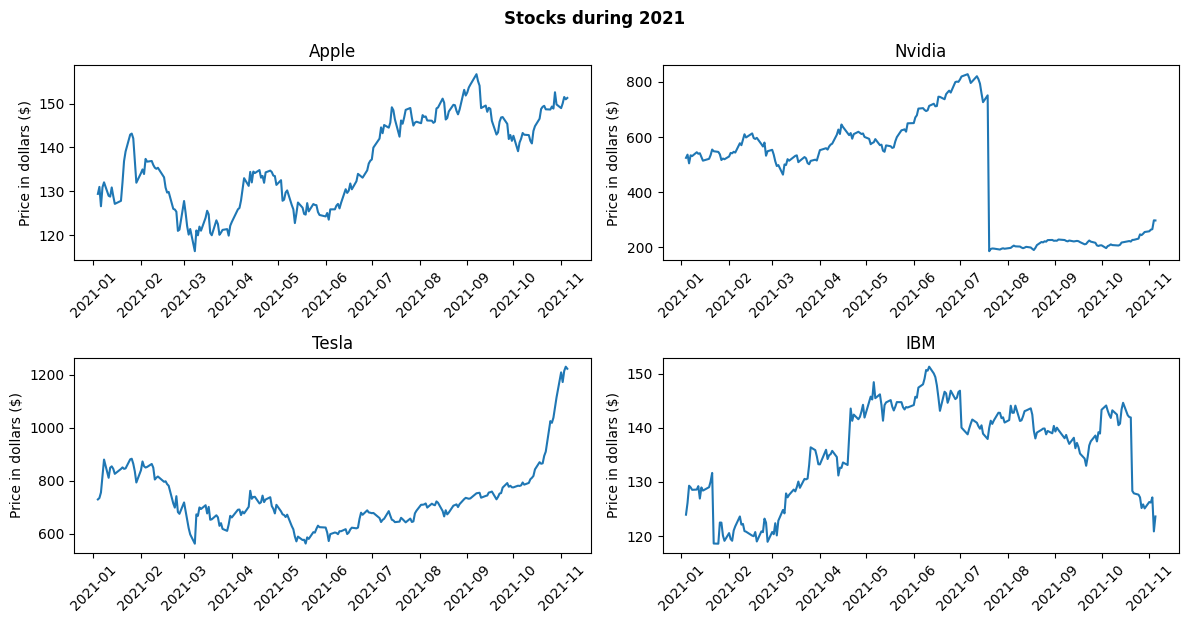

In [73]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

stock_2021 = stocks.loc["2021"]
stock_names = dict(AAPL = "Apple", NVDA = "Nvidia", TSLA = "Tesla", IBM = "IBM")

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stock_2021, x=stock_2021.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in dollars ($)")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03, fontweight="bold")
plt.savefig("stocks2021.png", facecolor="white")